# Цель проекта

- Выяснить наиболее популярную категорию продаваемого товара.
- Выяснить самый популярный товар по количеству продаж.
- Выяснить самый популярный товар по сумме прибыли.
- Выяснить самый лучший месяц по количеству продаж
- Выяснить самый лучший месяц по прибыли

# Импорт используемых библиотек

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from plotly.offline import iplot , plot
from plotly.subplots import make_subplots
import plotly.graph_objs as go

# Загрузка данных

In [3]:
df1 = pd.read_csv('Details.csv')
df1.head()

,Order ID,Amount,Profit,Quantity,Category,Sub-Category,PaymentMode
0,B-25681,1096,658,7,Electronics,Electronic Games,COD
1,B-26055,5729,64,14,Furniture,Chairs,EMI
2,B-25955,2927,146,8,Furniture,Bookcases,EMI
3,B-26093,2847,712,8,Electronics,Printers,Credit Card
4,B-25602,2617,1151,4,Electronics,Phones,Credit Card


In [4]:
# информация о первом датасете:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Order ID      1500 non-null   object
 1   Amount        1500 non-null   int64 
 2   Profit        1500 non-null   int64 
 3   Quantity      1500 non-null   int64 
 4   Category      1500 non-null   object
 5   Sub-Category  1500 non-null   object
 6   PaymentMode   1500 non-null   object
dtypes: int64(3), object(4)
memory usage: 82.2+ KB


Переименуем столбцы:
- Order ID -> OrderID
- Sub-Category -> SubCategory

In [34]:
df1 = df1.rename(columns={'Order ID': 'OrderID', 'Sub-Category': 'SubCategory'})
df1.head()
df1.sample(10)

,OrderID,Amount,Profit,Quantity,Category,SubCategory,PaymentMode
426,B-25950,136,-33,5,Clothing,Saree,COD
527,B-25651,159,4,1,Clothing,Saree,COD
1299,B-25802,633,-633,11,Electronics,Accessories,UPI
604,B-26081,93,-84,3,Clothing,Saree,UPI
284,B-25903,336,57,2,Electronics,Phones,COD
952,B-25604,157,5,9,Clothing,Saree,UPI
1064,B-25785,45,0,2,Clothing,T-shirt,COD
234,B-25925,27,12,1,Clothing,Stole,Debit Card
338,B-25977,74,29,3,Clothing,Stole,COD
824,B-25921,170,19,5,Clothing,T-shirt,UPI


In [6]:
# Кол-во пропусков по столбцам:
df1.isnull().sum()

OrderID        0
Amount         0
Profit         0
Quantity       0
Category       0
SubCategory    0
PaymentMode    0
dtype: int64

In [7]:
# Статистики для некатегориальных признаков:
df1.describe()

,Amount,Profit,Quantity
count,1500.000000,1500.00000,1500.000000
mean,291.847333,24.64200,3.743333
std,461.924620,168.55881,2.184942
min,4.000000,-1981.00000,1.000000
25%,47.750000,-12.00000,2.000000
50%,122.000000,8.00000,3.000000
75%,326.250000,38.00000,5.000000
max,5729.000000,1864.00000,14.000000


In [8]:
# Статистики для категориальных признако:
df1.describe(exclude=np.number)

,OrderID,Category,SubCategory,PaymentMode
count,1500,1500,1500,1500
unique,500,3,17,5
top,B-26056,Clothing,Saree,COD
freq,12,949,211,684


In [9]:
# Проверка на наличие дубликатов:
print(f'Количество дубликатов: {df1.duplicated().sum()}')

Количество дубликатов: 0


In [10]:
df2 = pd.read_csv('Orders.csv')
df2.head()

,Order ID,Order Date,CustomerName,State,City
0,B-26055,10-03-2018,Harivansh,Uttar Pradesh,Mathura
1,B-25993,03-02-2018,Madhav,Delhi,Delhi
2,B-25973,24-01-2018,Madan Mohan,Uttar Pradesh,Mathura
3,B-25923,27-12-2018,Gopal,Maharashtra,Mumbai
4,B-25757,21-08-2018,Vishakha,Madhya Pradesh,Indore


Переименуем столбцы:
- Order ID -> OrderID
- Order Date -> OrderDate

In [11]:
df2 = df2.rename(columns={'Order ID': 'OrderID', 'Order Date': 'OrderDate'})
df2.head()

,OrderID,OrderDate,CustomerName,State,City
0,B-26055,10-03-2018,Harivansh,Uttar Pradesh,Mathura
1,B-25993,03-02-2018,Madhav,Delhi,Delhi
2,B-25973,24-01-2018,Madan Mohan,Uttar Pradesh,Mathura
3,B-25923,27-12-2018,Gopal,Maharashtra,Mumbai
4,B-25757,21-08-2018,Vishakha,Madhya Pradesh,Indore


In [12]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   OrderID       500 non-null    object
 1   OrderDate     500 non-null    object
 2   CustomerName  500 non-null    object
 3   State         500 non-null    object
 4   City          500 non-null    object
dtypes: object(5)
memory usage: 19.7+ KB


In [13]:
# Кол-во пропусков по столбцам:
df2.isnull().sum()

OrderID         0
OrderDate       0
CustomerName    0
State           0
City            0
dtype: int64

In [14]:
# Статистики для категориальных признаков:
df2.describe()

,OrderID,OrderDate,CustomerName,State,City
count,500,500,500,500,500
unique,500,307,336,19,25
top,B-26055,24-11-2018,Shreya,Maharashtra,Indore
freq,1,7,6,94,71


In [15]:
# Проверка на наличие дубликатов:
print(f'Количество дубликатов: {df2.duplicated().sum()}')

Количество дубликатов: 0


# Слияние двух датасетов

In [16]:
merged_df = pd.merge(df1, df2, on='OrderID', how='left')
merged_df.head()

,OrderID,Amount,Profit,Quantity,Category,SubCategory,PaymentMode,OrderDate,CustomerName,State,City
0,B-25681,1096,658,7,Electronics,Electronic Games,COD,04-06-2018,Bhawna,Madhya Pradesh,Indore
1,B-26055,5729,64,14,Furniture,Chairs,EMI,10-03-2018,Harivansh,Uttar Pradesh,Mathura
2,B-25955,2927,146,8,Furniture,Bookcases,EMI,16-01-2018,Shiva,Maharashtra,Pune
3,B-26093,2847,712,8,Electronics,Printers,Credit Card,27-03-2018,Sarita,Maharashtra,Pune
4,B-25602,2617,1151,4,Electronics,Phones,Credit Card,01-04-2018,Vrinda,Maharashtra,Pune


In [17]:
print(f'Количество столбцов и строк в датасете:\nКоличество строк - {merged_df.shape[0]}\nКоличество столбцов - {merged_df.shape[1]}')

Количество столбцов и строк в датасете:
Количество строк - 1500
Количество столбцов - 11


In [18]:
# Кол-во пропусков по столбцам:
merged_df.isnull().sum()

OrderID         0
Amount          0
Profit          0
Quantity        0
Category        0
SubCategory     0
PaymentMode     0
OrderDate       0
CustomerName    0
State           0
City            0
dtype: int64

In [19]:
# Статистики для некатегориальных признаков:
merged_df.describe()

,Amount,Profit,Quantity
count,1500.000000,1500.00000,1500.000000
mean,291.847333,24.64200,3.743333
std,461.924620,168.55881,2.184942
min,4.000000,-1981.00000,1.000000
25%,47.750000,-12.00000,2.000000
50%,122.000000,8.00000,3.000000
75%,326.250000,38.00000,5.000000
max,5729.000000,1864.00000,14.000000


In [20]:
# Статистики для категориальных признаков:
merged_df.describe(exclude=np.number)

,OrderID,Category,SubCategory,PaymentMode,OrderDate,CustomerName,State,City
count,1500,1500,1500,1500,1500,1500,1500,1500
unique,500,3,17,5,307,336,19,25
top,B-26056,Clothing,Saree,COD,10-03-2018,Abhishek,Madhya Pradesh,Indore
freq,12,949,211,684,33,21,314,248


# Удаление ненужных столбцов

In [26]:
merged_df["OrderDate"] = pd.to_datetime(merged_df["OrderDate"],format="mixed")
merged_df["Year"] = merged_df["OrderDate"].dt.year
merged_df["Month"] = merged_df["OrderDate"].dt.month
merged_df.head()

,OrderID,Amount,Profit,Quantity,Category,SubCategory,PaymentMode,OrderDate,CustomerName,State,City,Order Date,Year,Month
0,B-25681,1096,658,7,Electronics,Electronic Games,COD,2018-04-06,Bhawna,Madhya Pradesh,Indore,2018-04-06,2018,4
1,B-26055,5729,64,14,Furniture,Chairs,EMI,2018-10-03,Harivansh,Uttar Pradesh,Mathura,2018-10-03,2018,10
2,B-25955,2927,146,8,Furniture,Bookcases,EMI,2018-01-16,Shiva,Maharashtra,Pune,2018-01-16,2018,1
3,B-26093,2847,712,8,Electronics,Printers,Credit Card,2018-03-27,Sarita,Maharashtra,Pune,2018-03-27,2018,3
4,B-25602,2617,1151,4,Electronics,Phones,Credit Card,2018-01-04,Vrinda,Maharashtra,Pune,2018-01-04,2018,1


In [94]:
merged_df.head()

,Amount,Profit,Quantity,Category,SubCategory,PaymentMode,CustomerName,State,City
0,1096,658,7,Electronics,Electronic Games,COD,Bhawna,Madhya Pradesh,Indore
1,5729,64,14,Furniture,Chairs,EMI,Harivansh,Uttar Pradesh,Mathura
2,2927,146,8,Furniture,Bookcases,EMI,Shiva,Maharashtra,Pune
3,2847,712,8,Electronics,Printers,Credit Card,Sarita,Maharashtra,Pune
4,2617,1151,4,Electronics,Phones,Credit Card,Vrinda,Maharashtra,Pune


# Визуализация

## Наиболее продаваемая категория

In [117]:
print(f'Количество уникальных категорий: {merged_df["Category"].nunique()}')
print(*merged_df["Category"].unique())

Количество уникальных категорий: 3
Electronics Furniture Clothing


In [229]:
iplot(px.pie(values = merged_df['Category'].value_counts(),
             names = ['Clothing', 'Electronics', 'Furniture'],
             title = 'Category'
            ).update_traces(textinfo='label+percent'))

## Количество продаж по категориям

In [221]:
# Сумма количества продаж по категориям:
category_sales = merged_df.groupby('Category')['Amount'].sum().reset_index()
category_sales.sort_values(by='Amount', ascending=False)

,Category,Amount
1,Electronics,166267
0,Clothing,144323
2,Furniture,127181


<BarContainer object of 3 artists>

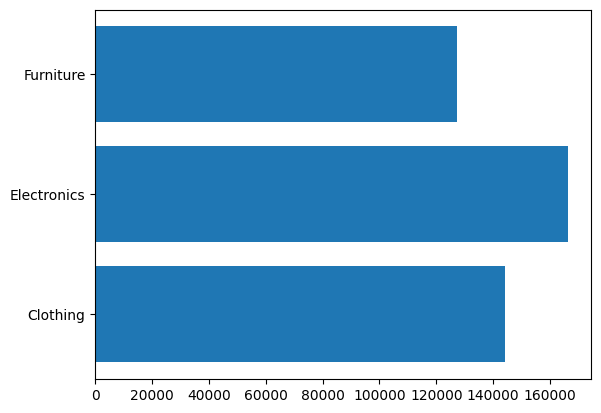

In [225]:
plt.barh(category_sales['Category'], category_sales['Amount'])

## Наиболее продаваемый товар по категориям

In [235]:
electronics_df = merged_df[merged_df['Category'] == 'Electronics']
subcategory_sales = electronics_df.groupby('SubCategory')['Amount'].sum().reset_index()
most_sold_products = subcategory_sales.sort_values(by='Amount', ascending=False)

,SubCategory,Amount
3,Printers,59252
2,Phones,46119
1,Electronic Games,39168
0,Accessories,21728


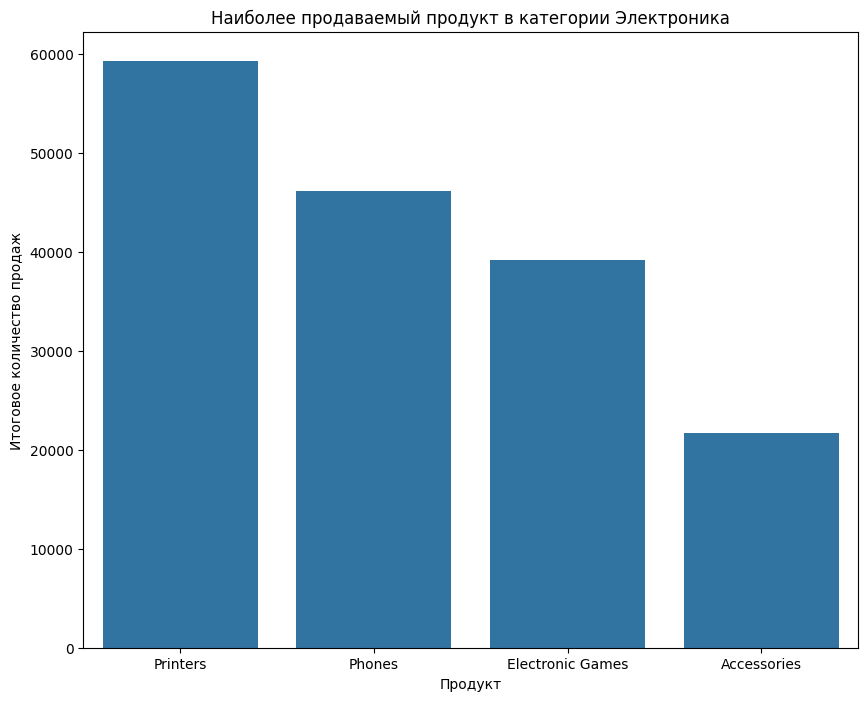

In [240]:
plt.figure(figsize=(10, 8))
sns.barplot(x='SubCategory', y='Amount', data=most_sold_products)
plt.title('Наиболее продаваемый продукт в категории Электроника')
plt.xlabel("Продукт")
plt.ylabel("Итоговое количество продаж")
plt.show()

In [244]:
clothing_df = merged_df[merged_df['Category'] == 'Clothing']
subcategory_sales = clothing_df.groupby('SubCategory')['Amount'].sum().reset_index()
most_sold_products = subcategory_sales.sort_values(by='Amount', ascending=False)
most_sold_products

,SubCategory,Amount
3,Saree,59094
8,Trousers,30039
6,Stole,18546
0,Hankerchief,14294
4,Shirt,7555
7,T-shirt,7382
1,Kurti,3361
2,Leggings,2106
5,Skirt,1946


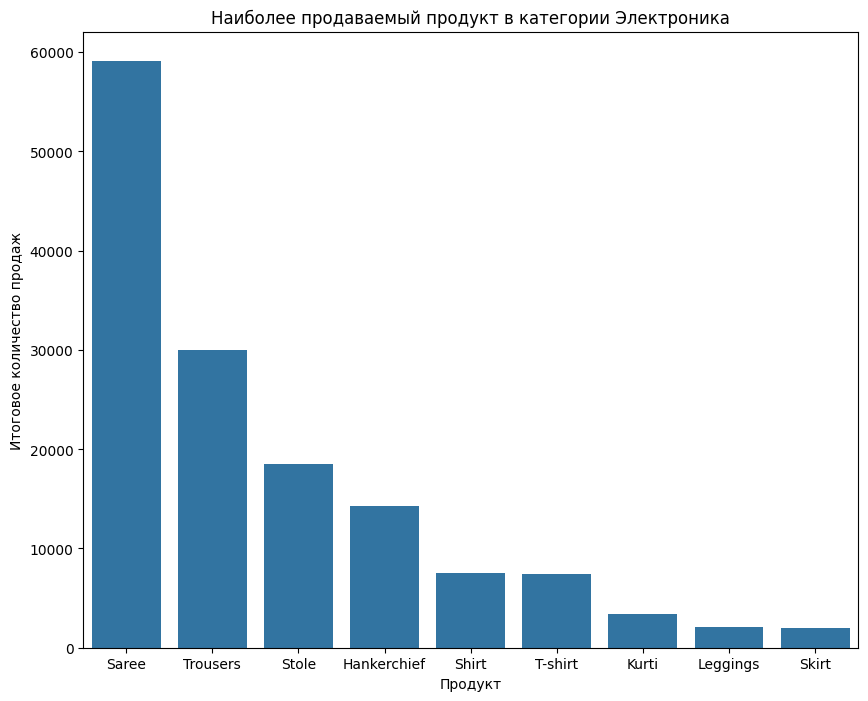

In [242]:
plt.figure(figsize=(10, 8))
sns.barplot(x='SubCategory', y='Amount', data=most_sold_products)
plt.title('Наиболее продаваемый продукт в категории Электроника')
plt.xlabel("Продукт")
plt.ylabel("Итоговое количество продаж")
plt.show()

In [246]:
furniture_df = merged_df[merged_df['Category'] == 'Furniture']
subcategory_sales = furniture_df.groupby('SubCategory')['Amount'].sum().reset_index()
most_sold_products = subcategory_sales.sort_values(by='Amount', ascending=False)
most_sold_products

,SubCategory,Amount
0,Bookcases,56861
1,Chairs,34222
3,Tables,22614
2,Furnishings,13484


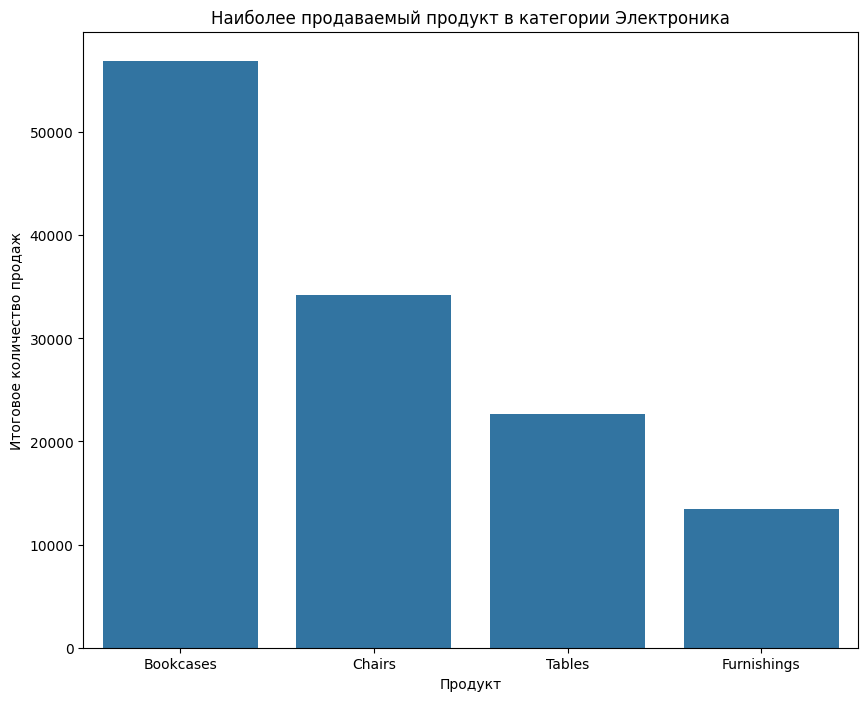

In [247]:
plt.figure(figsize=(10, 8))
sns.barplot(x='SubCategory', y='Amount', data=most_sold_products)
plt.title('Наиболее продаваемый продукт в категории Электроника')
plt.xlabel("Продукт")
plt.ylabel("Итоговое количество продаж")
plt.show()

## Прибыль по категориям

In [223]:
category_profit = merged_df.groupby('Category')['Profit'].sum().reset_index()
category_profit.sort_values(by='Profit', ascending=False)

,Category,Profit
0,Clothing,13325
1,Electronics,13162
2,Furniture,10476


<BarContainer object of 3 artists>

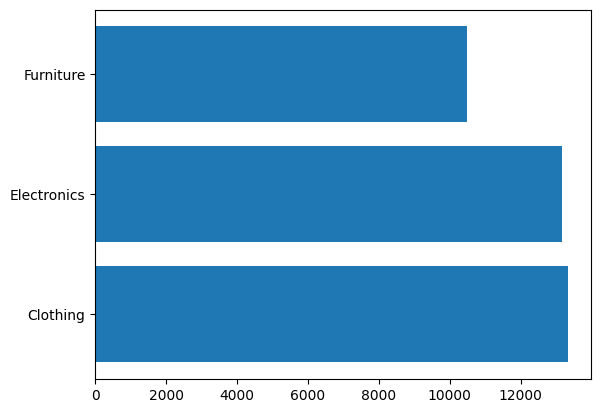

In [227]:
plt.barh(category_profit['Category'], category_profit['Profit'])

## Наиболее продаваемая подкатегория

In [120]:
print(f'Количество уникальных подкатегорий: {merged_df["SubCategory"].nunique()}')
print(merged_df["SubCategory"].unique())

Количество уникальных подкатегорий: 17
['Electronic Games' 'Chairs' 'Bookcases' 'Printers' 'Phones' 'Trousers'
 'Saree' 'Hankerchief' 'Kurti' 'Skirt' 'Tables' 'Stole' 'Leggings'
 'Accessories' 'T-shirt' 'Furnishings' 'Shirt']


In [185]:
iplot(px.bar(merged_df['SubCategory'].value_counts(),
             text_auto = True,
             title = 'Подкатегории',
             color_discrete_sequence=["#57936E"],
).update_xaxes(type=('category')))

## Наиболее популярный способ оплаты

In [186]:
print(f'Количество уникальных подкатегорий: {merged_df["PaymentMode"].nunique()}')
print(merged_df["PaymentMode"].unique())

Количество уникальных подкатегорий: 5
['COD' 'EMI' 'Credit Card' 'UPI' 'Debit Card']


In [188]:
iplot(px.bar(merged_df["PaymentMode"].value_counts(),
             text_auto = True,
             title = 'PaymentMode',
             color_discrete_sequence=["#57936E"],
).update_xaxes(type=('category')))

## Штат с наибольшим количеством продаж

In [189]:
print(f'Количество уникальных подкатегорий: {merged_df["State"].nunique()}')
print(merged_df["State"].unique())

Количество уникальных подкатегорий: 19
['Madhya Pradesh' 'Uttar Pradesh' 'Maharashtra' 'Karnataka'
 'Jammu and Kashmir' 'Nagaland' 'Rajasthan' 'Gujarat' 'Delhi'
 'Andhra Pradesh' 'Kerala ' 'Himachal Pradesh' 'Bihar' 'Punjab'
 'Tamil Nadu' 'Haryana' 'Goa' 'West Bengal' 'Sikkim']


In [191]:
iplot(px.bar(merged_df["State"].value_counts(),
             text_auto = True,
             title = 'Top States',
             color_discrete_sequence=["#7FFF00"],
).update_xaxes(type=('category')))

In [27]:
monthly_sales = merged_df.groupby("Month")["Amount"].sum().reset_index().sort_values(by="Amount",ascending=False)

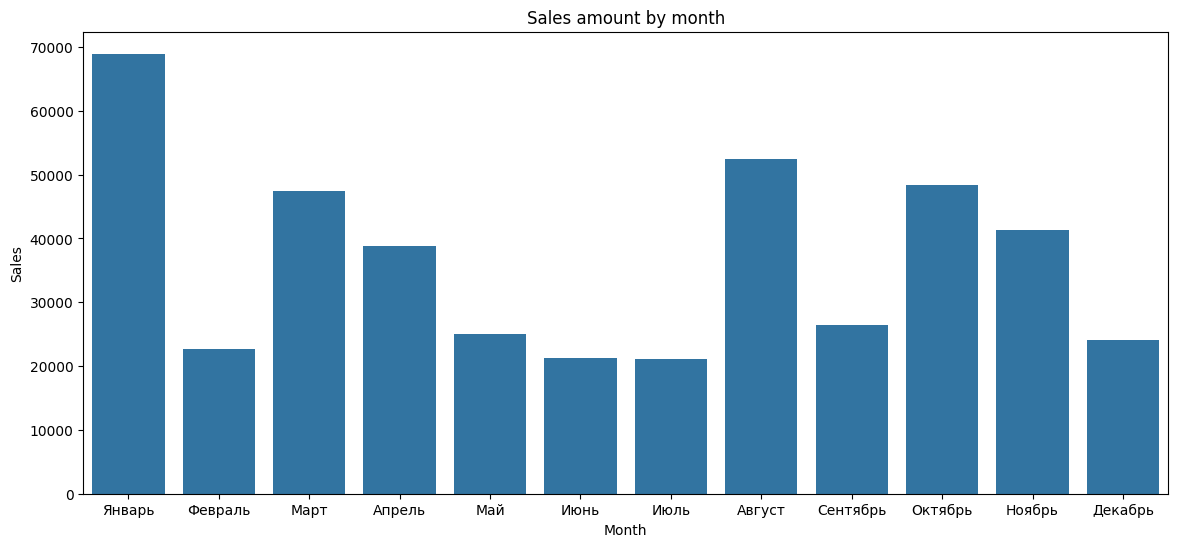

In [29]:
plt.figure(figsize=(14, 6))
month_names = ['Январь', 'Февраль', 'Март', 'Апрель', 'Май', 'Июнь', 'Июль', 'Август', 'Сентябрь', 'Октябрь', 'Ноябрь', 'Декабрь']
sns.barplot(x="Month",y="Amount",data = monthly_sales)
plt.title("Sales amount by month")
plt.xlabel("Month")
plt.ylabel("Sales")
plt.xticks(ticks=range(12),labels=month_names)
plt.show()

Вывод: январь - месяц наибольших продаж, за ним следуют август и октябрь.

In [31]:
monthly_profit = merged_df.groupby("Month")["Profit"].sum().reset_index().sort_values(by="Profit",ascending=False)

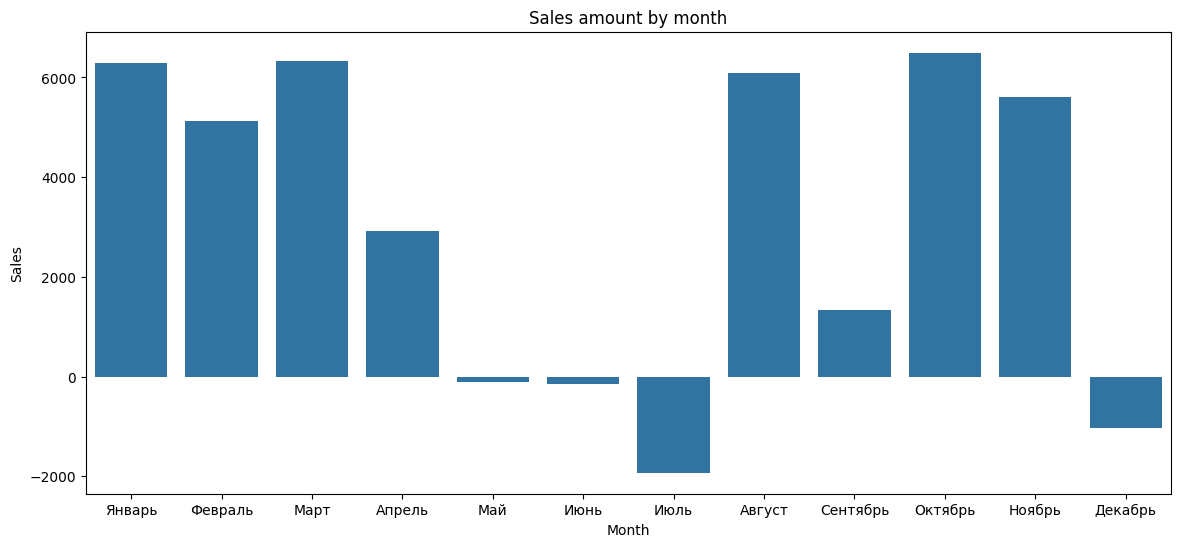

In [33]:
plt.figure(figsize=(14, 6))
month_names = ['Январь', 'Февраль', 'Март', 'Апрель', 'Май', 'Июнь', 'Июль', 'Август', 'Сентябрь', 'Октябрь', 'Ноябрь', 'Декабрь']
sns.barplot(x="Month",y="Profit",data = monthly_profit)
plt.title("Sales amount by month")
plt.xlabel("Month")
plt.ylabel("Sales")
plt.xticks(ticks=range(12),labels=month_names)
plt.show()

Вывод: май, июнь, июль и декабрь оказались убыточными. Октябрь оказался самым прибыльным месяцем